#**GOOGLE-DRIVE**

In [4]:
     !pip install -U -q PyDrive ## you will have install for every colab session

     from pydrive.auth import GoogleAuth
     from pydrive.drive import GoogleDrive
     from google.colab import auth
     from oauth2client.client import GoogleCredentials

     # 1. Authenticate and create the PyDrive client.
     auth.authenticate_user()
     gauth = GoogleAuth()
     gauth.credentials = GoogleCredentials.get_application_default()
     drive = GoogleDrive(gauth)


AttributeError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **RETRIEVING DRIVE**

In [0]:
import os
from google.colab import files

os.chdir("drive/My Drive/TCS/Quora_q")

In [0]:
!ls

questions.csv


# **RETRIEVING DATA**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv('questions.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
df = df.dropna()
df.shape

(404348, 6)

# **Data Visualisation**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


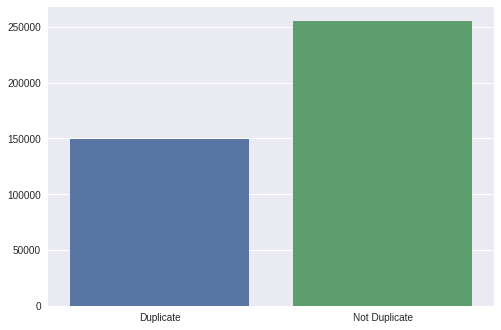

In [0]:
duplicates_pos = len(df[df['is_duplicate']==1])
duplicates_neg = len(df[df['is_duplicate']==0])

li = [duplicates_pos,duplicates_neg]
labels = ['Duplicate','Not Duplicate']

index = np.arange(len(li))

sn.set(style='darkgrid')
sn.barplot(labels,li)
plt.show()

In [0]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [0]:
#using 50000, so that timeout does not occur

df = df[:50000]

In [0]:
df.is_duplicate.value_counts()


0    31324
1    18624
Name: is_duplicate, dtype: int64

In [0]:
31350/len(df)

0.627652758869224

In [0]:
df.head()
print(df.question1[0])
print(df.question2[0])
print(df.question1[1])
print(df.question2[1])

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?


# **Cleaning the usage text**

In [0]:
from nltk.stem.snowball import SnowballStemmer
import re
def clean_part(clean, remove_stopwords=True):
  
  words = clean.lower().split()
  
  if remove_stopwords:
    stop = set(stopwords.words("english"))
    words = [w for w in words if not w in stop]
  
  review_text = " ".join(words)
  
  review_text = re.sub(r"[^A-Za-z0-9(),!.?\'\`]", " ",review_text)
  review_text = re.sub(r"\'s", " 's ", review_text)
  review_text = re.sub(r"\'ve", " 've ", review_text)
  review_text = re.sub(r"n\'t", " 't ", review_text)
  review_text = re.sub(r"\'re", " 're ", review_text)
  review_text = re.sub(r"\'d", " 'd ", review_text)
  review_text = re.sub(r"\'ll", " 'll ", review_text)
  review_text = re.sub(r",", " ", review_text)
  review_text = re.sub(r"\.", " ", review_text)
  review_text = re.sub(r"!", " ", review_text)
  review_text = re.sub(r"\(", " ( ", review_text)
  review_text = re.sub(r"\)", " ) ", review_text)
  review_text = re.sub(r"\?", " ", review_text)
  review_text = re.sub(r"\s{2,}", " ", review_text)
  
  words = review_text.split()
  
  stemmer = SnowballStemmer('english')
  stemmed_words = [stemmer.stem(word) for word in words]
  
  review_text = " ".join(stemmed_words)
  return(review_text)


In [0]:
def process_ques(question_list, questions, question_list_name):
  for question in questions:
    question_list.append(clean_part(question))
    if len(question_list)%10000 ==0:
      progress = len(question_list)/len(df) *100
      print('{} is {}% over.'.format(question_list_name,round(progress,1)))

In [0]:
question1 = []
question2 = []

process_ques(question1,df.question1,"questions1")

print()

process_ques(question2,df.question2,"questions2")


questions1 is 20.0% over.
questions1 is 40.0% over.
questions1 is 60.0% over.
questions1 is 80.0% over.
questions1 is 100.0% over.

questions2 is 20.0% over.
questions2 is 40.0% over.
questions2 is 60.0% over.
questions2 is 80.0% over.
questions2 is 100.0% over.


In [0]:
for i in range(10):
  print(question1[i])
  print(question2[i])
  print()

# **INVALID QUESTIONS**

In [0]:
invalid_ques =[]

#Questions should contain AEIOUY/aeiouy

for i in range(len(question1)):
  if not re.search('[aeiouyAEIOUY]',question1[i]) or not re.search('[aieouyAEIOUY]',question2[i]):
    invalid_ques.append(i-len(invalid_ques))
print(len(invalid_ques))

50


In [0]:
invalid_ques

# **Removing Invalid**

In [0]:
for indexer in invalid_ques:
  df = df[df.id!=indexer]
  question1.pop(indexer)
  question2.pop(indexer)

#cosine did not work after 60.02%

unexpected_ques = [36460,42273] #65937,304867,306828,353918

for indexer in unexpected_ques:
  df = df[df.id!=indexer]
  question1.pop(indexer)
  question2.pop(indexer)

In [0]:
print(len(question1))
print(len(question2))

49743
49743


#**Vectorizer**

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

vectorize = TfidfVectorizer()

def similar(sent1,sent2):
  tfidf = vectorize.fit_transform([sent1,sent2])
  return ((tfidf * tfidf.T).A)[0,1]


# **COSINE SIMILARITY**

In [0]:
tfidf_score = []

for i in range(len(question1)):
  score = similar(question1[i],question2[i])
  tfidf_score.append(score)
  if i%10000==0:
    progress = i/len(question1)*100
    print('Similar score:{}%'.format(round(progress,2)))

Similar score:0.0%
Similar score:20.1%
Similar score:40.21%
Similar score:60.31%


ValueError: ignored